In [1]:


import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz

%matplotlib inline



In [2]:


delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect
expt_list = [np.array(exp) for exp in expt_list]



[1/1] Cythonizing qtcoeff_e3b98a4da31a127d4bde6e43033f66.pyx
running build_ext
building 'qtcoeff_e3b98a4da31a127d4bde6e43033f66' extension
creating build
creating build/temp.macosx-10.9-universal2-3.9
clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -iwithsysroot/System/Library/Frameworks/System.framework/PrivateHeaders -iwithsysroot/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/Headers -arch arm64 -arch x86_64 -Werror=implicit-function-declaration -Wno-error=unreachable-code -I/Users/benadmin/Projects/George Research/QuantGenMdl/env/lib/python3.9/site-packages/qutip/core/data -I/Users/benadmin/Projects/George Research/QuantGenMdl/env/lib/python3.9/site-packages/numpy/core/include -I/Users/benadmin/Projects/George Research/QuantGenMdl/env/include -I/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/include/python3.9 -c qtcoeff_e3b98a4da31a

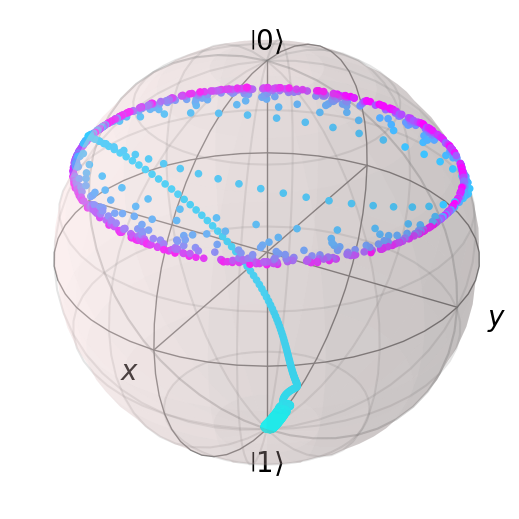

In [3]:


b = Bloch()
# normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2, 10)
colors = cm.cool(nrm(tlist))

# add data points from expectation values ##
b.add_points([expt_list[1], expt_list[2], -expt_list[3]], "m")

# customize sphere properties ##
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()



In [4]:


left, bottom, width, height = [0.98, 0.05, 0.05, 0.9]
ax2 = b.fig.add_axes([left, bottom, width, height])

mpl.colorbar.ColorbarBase(ax2, cmap=cm.cool, norm=nrm, orientation="vertical");



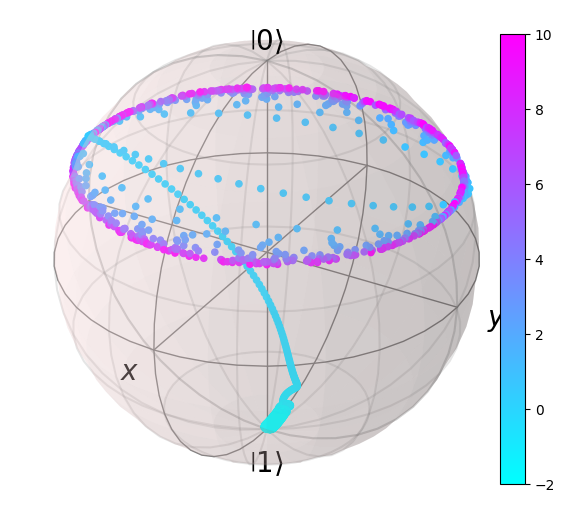

In [5]:
b.fig